In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from neurodyn import *
import numpy as np
import matplotlib.pyplot as plt, matplotlib.colors as mplcolors
import scipy.stats as stats
from matplotlib_tufte import *
import itertools
setup()

## total discontinuity

$$
TV = \frac{1}{4^n}\sum_{i=1}^{4^n}|f_1(i/4^n) - f_1((i-1)/4^n)| + |f_2(i/4^n) - f_2((i-1)/4^n)| \xrightarrow[]{n\to\infty} 0
$$

all the mappings tend to 0. $4^n$ can be proven to be the upper bound

In [3]:
def VT(F: np.ndarray) -> tuple[float, float]:
	"""Total variations due to the discontinuities in x and y"""
	# vx, vy = 0.0, 0.0
	# for i in range(1, len(F)):
	# 	vx += abs(F[i, 0] - F[i-1, 0])
	# 	vy += abs(F[i, 1] - F[i-1, 1])
	# return vx, vy
	return np.abs(np.diff(F, axis=0)).sum(axis=0)

In [162]:
mapping_clss = {'Z': ZMapping, 'Reclocal': RecursiveLocalMapping, 'Column': ReshapeMapping, 'Diagonal': DiagonalMapping, 'Szudzik': SzudzikMapping}
mapping_Vs = { key: [] for key in mapping_clss }
nrecs = [1,2,3,4,5,6,7,8]
# nrecs = [1,2,3,4,5,6,7,8,9,10,11,12]

for name, mapping_cls in mapping_clss.items():
	for nrec in nrecs:
		F = mapping_cls.new_nrec(nrec).inverse_samples(centered=False)
		mapping_Vs[name].append(VT(F))

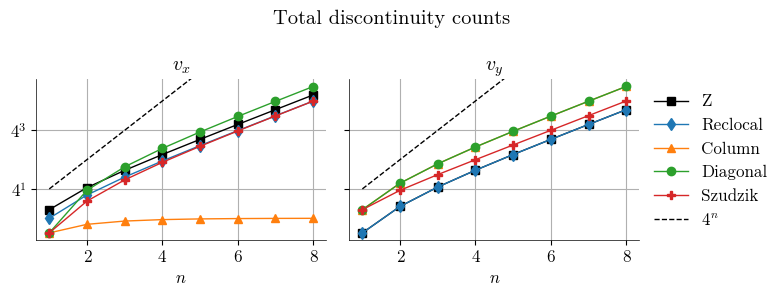

In [208]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 3), sharey=True, sharex=True)
marker = itertools.cycle(('s', 'd', '^', 'o', 'P'))
for name, Vs in mapping_Vs.items():
	Vs = np.array(Vs)
	m = next(marker)
	axes[0].plot(nrecs, Vs[:, 0], marker=m, label=name)
	axes[1].plot(nrecs, Vs[:, 1], marker=m, label=name)
axes[0].set_title('$v_x$')
axes[1].set_title('$v_y$')
axes[0].set_xlabel('$n$')
axes[1].set_xlabel('$n$')
axes[0].set_yscale('log', base=4)
axes[1].set_yscale('log', base=4)
axes[0].set_autoscaley_on(False)
axes[0].plot(nrecs, 4**np.array(nrecs), color='k', linestyle='--', label='$4^n$')
axes[1].set_autoscaley_on(False)
axes[1].plot(nrecs, 4**np.array(nrecs), color='k', linestyle='--', label='$4^n$')
axes[1].legend(loc='upper left', bbox_to_anchor=(1,1))
axes[0].grid(True)
axes[1].grid(True)
fig.suptitle('Total discontinuity counts');

## discontinuity histogram

In [5]:
def V_hist_xy(F: np.ndarray) -> tuple[tuple[np.ndarray, np.ndarray], tuple[np.ndarray, np.ndarray]]:
	Vs = np.abs(np.diff(F, axis=0))
	return np.unique(Vs[:, 0], axis=0, return_counts=True), np.unique(Vs[:, 1], axis=0, return_counts=True)
	
def V_hist(F: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
	Vs = np.abs(np.diff(F, axis=0)).sum(axis=1)
	print(np.median(Vs, axis=0))
	return np.unique(Vs, axis=0, return_counts=True)

### x and y separately

Column 0.99609375 509.00390625
Diagonal 507.01171875 509.00390625
Szudzik 254.00390625 255.99609375
Z 340.33203125 169.66796875
Reclocal 255.0 169.66796875


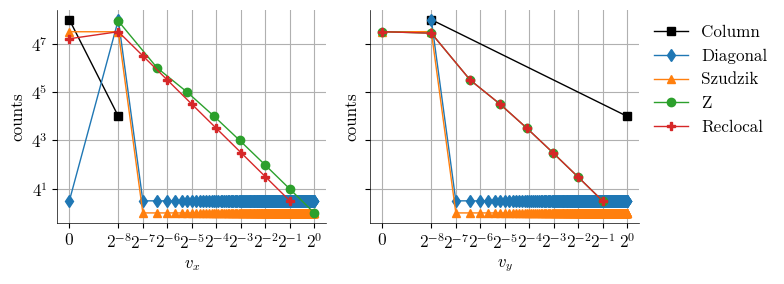

In [6]:
mapping_clss: dict[str, BinMapping] = {'Column': ReshapeMapping, 'Diagonal': DiagonalMapping, 'Szudzik': SzudzikMapping, 'Z': ZMapping, 'Reclocal': RecursiveLocalMapping}

fig, axes = plt.subplots(ncols=2, figsize=(8, 3), sharey=True, sharex=True)
marker = itertools.cycle(('s', 'd', '^', 'o', 'P'))
colors = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
nrec = 8

for name, mapping_cls in mapping_clss.items():
	c, m = next(colors), next(marker)
	histx, histy = V_hist_xy(mapping_cls.new_nrec(nrec).inverse_samples(centered=False))
	print(name, (histx[0]*histx[1]).sum(), (histy[0]*histy[1]).sum())
	axes[0].plot(histx[0], histx[1], marker=m, color=c, label=name)
	axes[1].plot(histy[0], histy[1], marker=m, color=c, label=name)

axes[0].set_xscale('symlog', linthresh=2**(-nrec), base=2)
axes[0].set_yscale('log', base=4)
axes[1].set_xscale('symlog', linthresh=2**(-nrec), base=2)
axes[1].set_yscale('log', base=4)
axes[1].legend(loc='upper left', bbox_to_anchor=(1,1))
axes[0].grid()
axes[1].grid()
axes[0].set_xlabel('$v_x$')
axes[0].set_ylabel('counts')
axes[1].set_xlabel('$v_y$')
axes[1].set_ylabel('counts')

plt.show()

### x+y

Z
0.00390625
Reclocal
0.00390625
Column
0.00390625
Diagonal
0.0078125
Szudzik
0.00390625


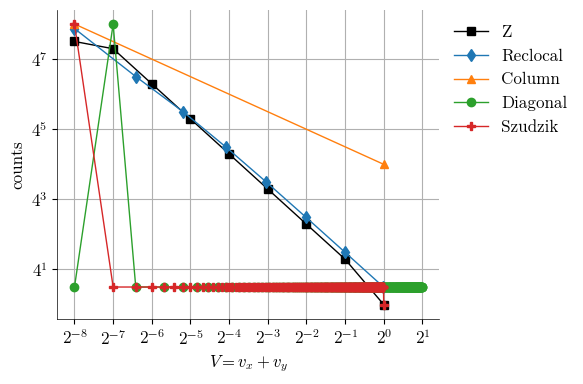

In [226]:
mapping_clss: dict[str, BinMapping] = {'Z': ZMapping, 'Reclocal': RecursiveLocalMapping, 'Column': ReshapeMapping, 'Diagonal': DiagonalMapping, 'Szudzik': SzudzikMapping}

fig, ax = plt.subplots(figsize=(6, 4), sharey=True, sharex=True)
marker = itertools.cycle(('s', 'd', '^', 'o', 'P'))
colors = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
nrec = 8

for name, mapping_cls in mapping_clss.items():
	c, m = next(colors), next(marker)
	print(name)
	hist = V_hist(mapping_cls.new_nrec(nrec).inverse_samples(centered=False))
	ax.plot(hist[0], hist[1], marker=m, color=c, label=name)

ax.set_xscale('symlog', linthresh=2**(-nrec), base=2)
ax.set_yscale('log', base=4)
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.grid()
ax.set_xlabel('$V = v_x + v_y$')
ax.set_ylabel('counts')

plt.show()

## binning error

$$
V = \frac{1}{2^n}\sum_{i=1}^{2^n} \sup_{z,z' \in \{\frac{k}{4^n} | k= 1, \cdots, 2^n\}} |f^n_1(\tfrac{i-1}{2^n}+z) - f^n_1(\tfrac{i-1}{2^n}+z')| + |f^n_2(\tfrac{i-1}{2^n}+z) - f^n_2(\tfrac{i-1}{2^n}+z')|
$$

In [3]:
def V(F: np.ndarray) -> np.ndarray:
	nrec = int(np.emath.logn(4, len(F)))
	F_ = F.reshape((2**nrec, 2**nrec, 2))
	# F_ = np.roll(F, 2**nrec).reshape((2**nrec, 2**nrec, 2))  # offset the bins halfway to test
	return (F_.max(axis=1) - F_.min(axis=1)).sum(axis=0)

0 [0.375 0.125]
1 [0.375 0.125]
2 [0.375 0.125]
3 [0.375 0.125]
4 [0.375 0.125]
5 [0.375 0.125]
6 [0.375 0.125]
7 [0.375 0.125]


array([3., 1.])

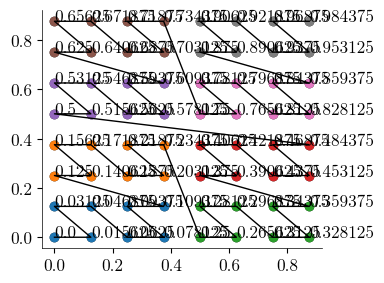

In [5]:
nrec = 3
mapping = ZMapping.new_nrec(nrec)
F = mapping.inverse_samples(centered=False)
values = mapping(F)
plt.scatter(*F.T)
plt.plot(*F.T)

F_ = F.reshape((2**nrec, 2**nrec, 2))
values_ = values.reshape((2**nrec, 2**nrec))
for i in range(2**nrec):
	plt.scatter(*F_[i, :, :].T)
	print(i, F_[i].max(axis=0) - F_[i].min(axis=0))
	for xy, v in zip(F_[i], values_[i]):
		plt.annotate(str(v), xy)
	# NOTE : F_[i, :, :] contains each 2**nrec 'th bin
	# when we take average over axis=1, we are summing together strided offsets

V(F)

0 [0.   0.75]
1 [0.   0.75]
2 [0.   0.75]
3 [0.   0.75]


array([0., 3.])

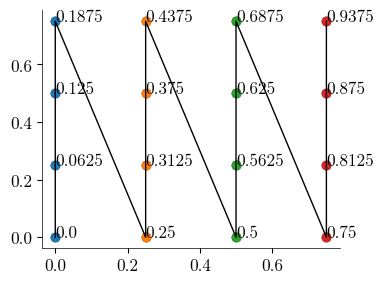

In [72]:
nrec = 2
mapping = ColumnMapping.new_nrec(nrec)
F = mapping.inverse_samples(centered=False)
values = mapping(F)
plt.scatter(*F.T)
plt.plot(*F.T)

F_ = F.reshape((2**nrec, 2**nrec, 2))
values_ = values.reshape((2**nrec, 2**nrec))
for i in range(2**nrec):
	plt.scatter(*F_[i, :, :].T)
	# print(i, np.max(np.abs(np.diff(F_[i], axis=0)), axis=0))
	print(i, F_[i].max(axis=0) - F_[i].min(axis=0))
	for xy, v in zip(F_[i], values_[i]):
		plt.annotate(str(v), xy)
	# NOTE : F_[i, :, :] contains each 2**nrec 'th bin
	# when we take average over axis=1, we are summing together strided offsets

V(F)

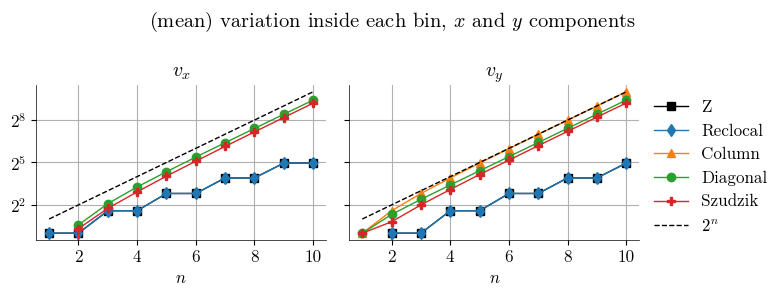

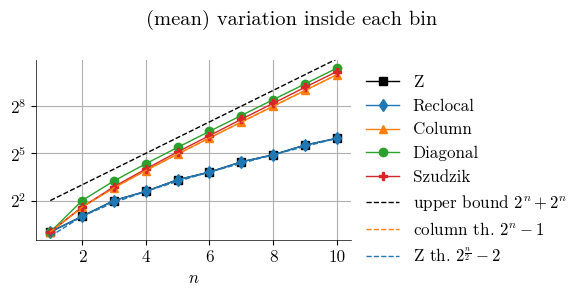

In [124]:
mapping_clss = {'Z': ZMapping, 'Reclocal': RecursiveLocalMapping, 'Column': ColumnMapping, 'Diagonal': DiagonalMapping, 'Szudzik': SzudzikMapping}
mapping_Vs = { key: [] for key in mapping_clss }
nrecs = np.array([1,2,3,4,5,6,7,8,9,10])

for name, mapping_cls in mapping_clss.items():
	for nrec in nrecs:
		F = mapping_cls.new_nrec(nrec).inverse_samples(centered=False)
		mapping_Vs[name].append(V(F))

fig, axes = plt.subplots(ncols=2, figsize=(8, 3), sharey=True, sharex=True)
marker = itertools.cycle(('s', 'd', '^', 'o', 'P'))
for name, Vs in mapping_Vs.items():
	Vs = np.array(Vs)
	m = next(marker)
	axes[0].plot(nrecs, Vs[:, 0], marker=m, label=name)
	axes[1].plot(nrecs, Vs[:, 1], marker=m, label=name)
axes[0].set_title('$v_x$')
axes[1].set_title('$v_y$')
axes[0].set_xlabel('$n$')
axes[1].set_xlabel('$n$')
axes[0].set_yscale('log', base=2)
axes[1].set_yscale('log', base=2)
axes[0].set_autoscaley_on(False)
axes[0].plot(nrecs, 2**np.array(nrecs), color='k', linestyle='--', label='$2^n$')
axes[1].set_autoscaley_on(False)
axes[1].plot(nrecs, 2**np.array(nrecs), color='k', linestyle='--', label='$2^n$')
axes[1].legend(loc='upper left', bbox_to_anchor=(1,1))
axes[0].grid(True)
axes[1].grid(True)
fig.suptitle('(mean) variation inside each bin, $x$ and $y$ components');

fig, ax = plt.subplots(figsize=(6, 3))
marker = itertools.cycle(('s', 'd', '^', 'o', 'P'))
for name, Vs in mapping_Vs.items():
	m = next(marker)
	ax.plot(nrecs, np.array(Vs).sum(axis=-1), marker=m, label=name)
ax.set_xlabel('$n$')
ax.set_yscale('log', base=2)
ax.set_autoscaley_on(False)
ax.plot(nrecs, 2**(nrecs+1), color='k', linestyle='--', label='upper bound $2^n + 2^n$')
ax.plot(nrecs, 2**nrecs-1, color='tab:orange', linestyle='--', label='column th. $2^n - 1$')
ax.plot(nrecs, 2*(2**(nrecs/2)-1), color='tab:blue', linestyle='--', label='Z th. $2^{\\frac{n}{2}} - 2$')
ax.grid(True)
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
fig.suptitle('(mean) variation inside each bin');

## sanity check the mappings

(42.625, 21.3125)

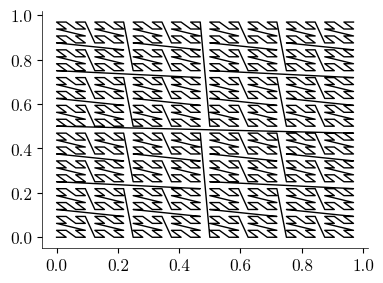

In [62]:
nrec = 5
mapping = ZMapping.new_nrec(nrec)
Z = np.linspace(0, 1-1/4**nrec, 4**nrec)
F = mapping.inverse_samples(centered=False)
plt.plot(*F.T)
VT(F)

array([ 0.875, 13.125])

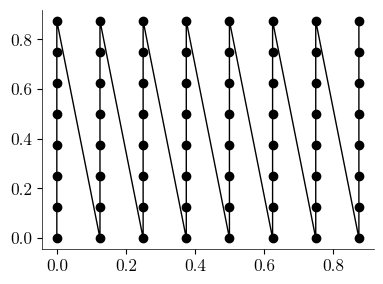

In [8]:
nrec = 3
mapping = ReshapeMapping.new_nrec(nrec)
Z = np.linspace(0, 1-1/4**nrec, 4**nrec)
F = mapping.inverse_samples(centered=False)
plt.plot(*F.T, marker='o')
VT(F)

(60.0625, 62.0)

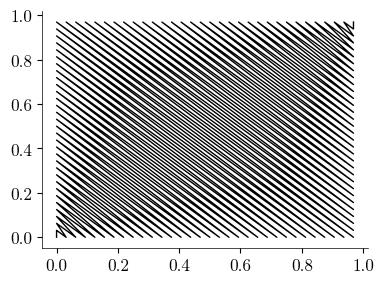

In [68]:
nrec = 5
mapping = DiagonalMapping.new_nrec(nrec)
Z = np.linspace(0, 1-1/4**nrec, 4**nrec)
F = mapping.inverse_samples(centered=False)
plt.plot(*F.T)
VT(F)

(31.0, 21.3125)

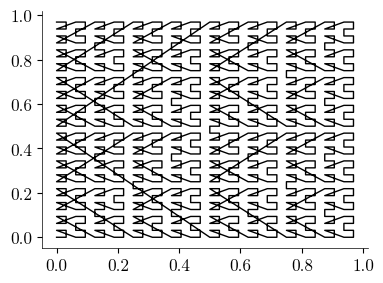

In [65]:
nrec = 5
mapping = RecursiveLocalMapping.new_nrec(nrec)
Z = np.linspace(0, 1-1/4**nrec, 4**nrec)
F = mapping.inverse_samples(centered=False)
plt.plot(*F.T)
VT(F)

(31.0, 32.9375)

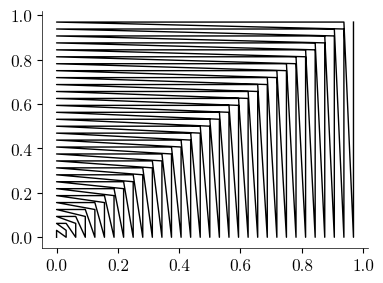

In [66]:
nrec = 5
mapping = SzudzikMapping.new_nrec(nrec)
Z = np.linspace(0, 1-1/4**nrec, 4**nrec)
F = mapping.inverse_samples(centered=False)
plt.plot(*F.T)
VT(F)